In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [70]:
def min_max(n):
  n_min = np.min(n)
  n_max = np.max(n)

  n_delta = n_max - n_min

  n_min -= 0.1*n_delta
  n_max += 0.1*n_delta

  return n_min, n_max

In [71]:
def f(x_in):
  return np.cos(x_in)

In [72]:
x = np.linspace(-np.pi, np.pi, 10)
x_min, x_max = min_max(x)
x

array([-3.14159265, -2.44346095, -1.74532925, -1.04719755, -0.34906585,
        0.34906585,  1.04719755,  1.74532925,  2.44346095,  3.14159265])

In [73]:
y = f(x)
y_min, y_max = min_max(y)
y

array([-1.        , -0.76604444, -0.17364818,  0.5       ,  0.93969262,
        0.93969262,  0.5       , -0.17364818, -0.76604444, -1.        ])

(-1.1939692620785909, 1.133661882864499)

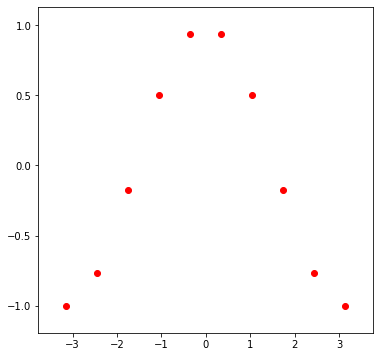

In [74]:
fig1 = plt.figure(figsize=(6, 6))
p1 = fig1.add_subplot(111)
p1.scatter(x,y,c='red')
p1.set_xlim(x_min, x_max)
p1.set_ylim(y_min, y_max)

In [75]:
def sigmoid(x_in):
  return 1/(1 + np.exp(-x_in))

def sigmoid_d(x_in):
  s_x_in = sigmoid(x_in)
  return s_x_in * (1 - s_x_in)

def relu(x_in):
  return np.maximum(0, x_in)

def relu_d(x_in):
  return (x_in > 0) * 1

def tanh(x_in):
  return np.tanh(x_in)

def tanh_d(x_in):
  return 1 - tanh(x_in)**2

In [76]:
def loss_f(y_out, y_target):
  return (y_target - y_out)**2

In [77]:
def gen_weights(nh):
  wg1 = np.random.rand(nh, 1) - 0.5
  wg2 = np.random.rand(1, nh) - 0.5

  return [wg1, wg2]

In [78]:
def gen_bias(nh):
  bg1 = np.random.rand(nh, 1) - 0.5
  bg2 = np.random.rand(1, 1) - 0.5
  
  return [bg1, bg2]

In [79]:
def loss_f_d(y_out, y_target):
  return (-2) * (y_target - y_out)

In [80]:
def forward(fw, fb, x_i):
  z1 = fw[0].dot(x_i) + fb[0]
  a1 = sigmoid(z1)

  z2 = fw[1].dot(a1) + fb[1]
  a2 = z2

  return [z1, z2], [a1, a2]

In [81]:
def plot(wp, bp):
  NOS=1000
  fig2 = plt.figure(figsize=(6, 6))
  p2 = fig2.add_subplot(111)

  x_l = np.linspace(x_min, x_max, NOS).reshape(1, NOS)
  _, y_l1 = forward(wp, bp, x_l)
  x_l = x_l.reshape(NOS)
  y_l2 = f(x_l)

  p2.plot(x_l, y_l1[1].reshape(NOS), c='black')
  p2.plot(x_l, y_l2, c='green', alpha=0.5)

  #p2.scatter(x,y,c='red')
  p2.set_xlim(x_min, x_max)

In [82]:
def train(wt, bt, at, it, xt, yt, di):
  wt = wt.copy()
  bt = bt.copy()

  for i in range(it):
    cond = ((i + 1) % di) == 0
    loss = 0.0

    for j in range(xt.shape[0]):
      zi, ai = forward(wt, bt, xt[j])
      loss += loss_f(ai[1], yt[j])

      dz = [None] * 2
      dz[1] = loss_f_d(ai[1], yt[j])
      dz[0] = w[1].T.dot(dz[1]) * sigmoid_d(zi[0])

      wt[1] = wt[1] - at * dz[1].dot(ai[0].T)
      bt[1] = bt[1] - at * np.sum(dz[1])

      wt[0] = wt[0] - at * dz[0].dot(xt[j])
      bt[0] = bt[0] - at * np.sum(dz[0])
    
    if cond:
      print("iteration #{}: loss: {:.6f}\n".format(i + 1, float(loss / xt.shape[0])))
  
  return wt, bt

In [83]:
n = 10
w = gen_weights(n)
b = gen_bias(n)
alpha, iter, step = 0.1, 1000, 100
n_w, n_b = train(w, b, alpha, iter, x, y, step)

iteration #100: loss: 0.038699

iteration #200: loss: 0.014963

iteration #300: loss: 0.006057

iteration #400: loss: 0.008557

iteration #500: loss: 0.008764

iteration #600: loss: 0.006401

iteration #700: loss: 0.005189

iteration #800: loss: 0.005145

iteration #900: loss: 0.005409

iteration #1000: loss: 0.005681



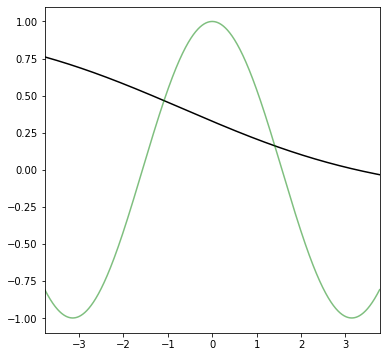

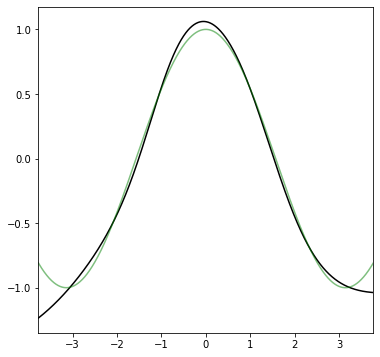

In [84]:
plot(w, b)
plot(n_w, n_b)